# Image Manipulation with OpenCV and NumPy
## [Part 1](https://bit.ly/3qTrObl)

## Introduction

### Import Libraries

In [1]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

## Basic Operations on Images with OpenCV

### Read in the image.

In [2]:
path = "../../media/images/"
file_name = input("Enter file name to use:")
image_file = cv2.imread(path+file_name)

Enter file name to use:fly.jpg


In [3]:
print(image_file[:2,:2])

[[[109 122 136]
  [107 123 136]]

 [[110 123 137]
  [107 120 134]]]


#### Convert input file from `BGR` to `RGB`

In [4]:
image_rgb = cv2.cvtColor(image_file,cv2.COLOR_BGR2RGB)
print(image_rgb[:2,:2])

[[[136 122 109]
  [136 123 107]]

 [[137 123 110]
  [134 120 107]]]


### Display image
Code below will display the image window and close when you press any key on the keyboard

In [5]:
cv2.imshow("Image",image_file)
cv2.waitKey(-1)
cv2.destroyAllWindows()

Code below will display the image window and close when you press the letter **`q`** on the keyboard

In [6]:
test = True
while test:
    cv2.imshow("Image",image_file)
    k = cv2.waitKey(1)
    if k == ord('q'):
        test = False
cv2.destroyAllWindows()

#### Define `cv2_show_image()` to display images

In [7]:
def cv2_show_image(name,image):
    test = True
    while test:
        cv2.imshow(name,image)
        k = cv2.waitKey(1)
        if k == ord('q'):
            test = False
    cv2.destroyAllWindows()

In [8]:
cv2_show_image("Image",image_file)

In [9]:
cv2_show_image("Image", image_rgb)

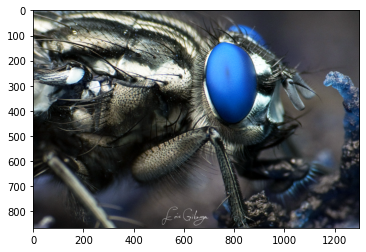

In [10]:
plt.imshow(image_file);

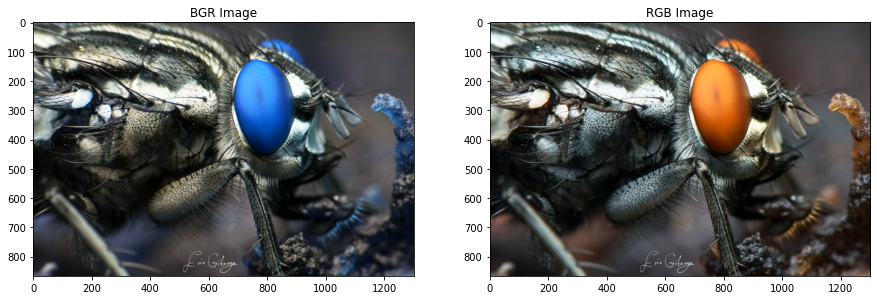

In [11]:
plt.figure(figsize=(15,10))
plt.subplot(121);plt.imshow(image_file);plt.title("BGR Image");
plt.subplot(122);plt.imshow(image_rgb);plt.title("RGB Image");

#### Display image information (shape, size, data type)

In [12]:
input_image = image_file.copy()
input_image.shape, input_image.size, input_image.dtype

((866, 1300, 3), 3377400, dtype('uint8'))

### Cropping the image

In [13]:
src = image_rgb
row_start, row_stop, col_start, col_stop = 200, 300, 750, 850
print(src[row_start:row_stop,col_start:col_stop].shape,
      src[row_start:row_stop,col_start:col_stop].size)

(100, 100, 3) 30000


In [14]:
print(src[row_start:row_stop,col_start:col_stop,1].shape,
      src[row_start:row_stop,col_start:col_stop,1].size)

(100, 100) 10000


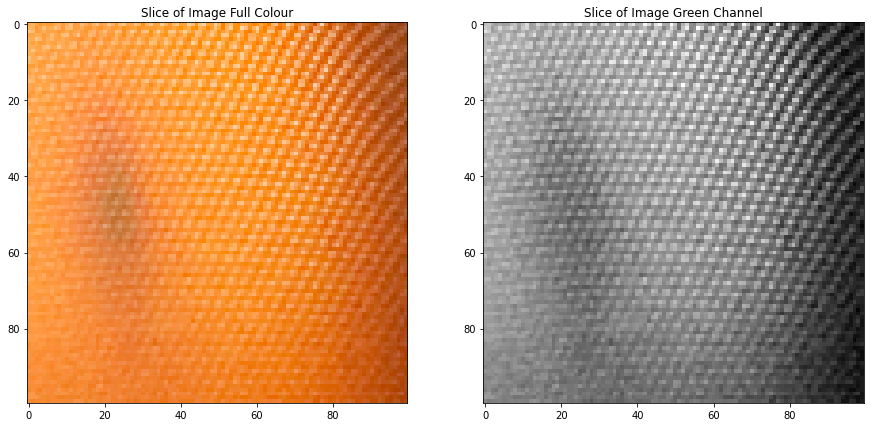

In [15]:
plt.figure(figsize=(15,10))

plt.subplot(121)
plt.imshow(src[row_start:row_stop,col_start:col_stop])
plt.title("Slice of Image Full Colour");

plt.subplot(122)
plt.imshow(src[row_start:row_stop,col_start:col_stop,1], cmap="gray")
plt.title("Slice of Image Green Channel");

### Replace colour in specific portion of the image

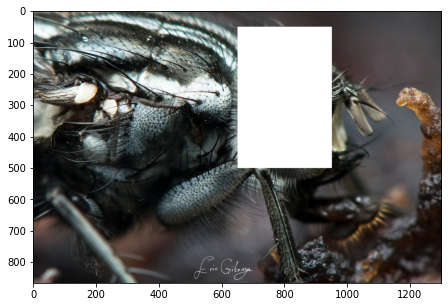

In [16]:
image_rgb_copy = image_rgb.copy()
image_rgb_copy[50:500,650:950] = 255
plt.figure(figsize=(10,5))
plt.imshow(image_rgb_copy);

### Resize Image

In [17]:
input_image = cv2.resize(image_file, (1200,800), interpolation = cv2.INTER_AREA)

In [18]:
src = input_image
shrunk_image = cv2.resize(src, (600,400), interpolation = cv2.INTER_AREA)
enlarged_image = cv2.resize(src, None, 2, 2, cv2.INTER_CUBIC)

In [19]:
input_image.shape, shrunk_image.shape, enlarged_image.shape

((800, 1200, 3), (400, 600, 3), (1600, 2400, 3))

In [20]:
input_image.size, shrunk_image.size, enlarged_image.size

(2880000, 720000, 11520000)

#### Define `image_resize()` to resize image

In [21]:
def image_resize(image,sf):
    return cv2.resize(image, None, fx=sf, fy=sf, interpolation=cv2.INTER_AREA)

### Write Image to File

In [22]:
cv2.imwrite(path+"resized.tiff", input_image)

True